## 지도학습 회귀 미리보기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 농어 무게 예측하기
- K-최근접이웃 회귀모델을 통해 길이값으로 무게 예측

In [4]:
# 데이터 준비
# - 입력 : 길이
# - 라벨(정답) : 무게게
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

perch_length.shape, perch_weight.shape

((56,), (56,))

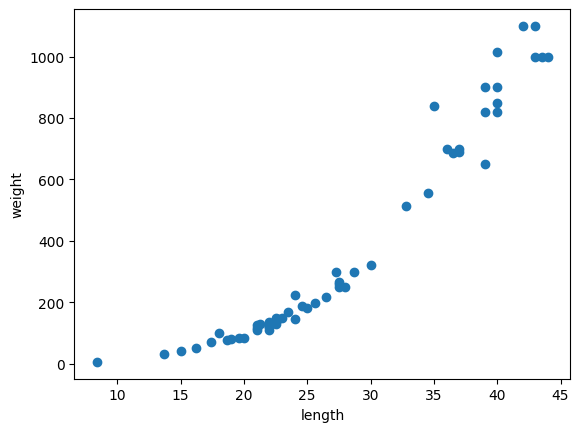

In [5]:
# 데이터 시각화: 산전도
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [6]:
# 훈련/테스트 데이터 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_label, test_label = train_test_split(perch_length, perch_weight, random_state=42)

train_input.shape, test_input.shape, train_label.shape, test_label.shape

((42,), (14,), (42,), (14,))

In [7]:
42 / 56 # test_size를 지정하지 않으면 통상적인 7:3 비율로 나눠지는 것을 확인 할 수 있음

0.75

In [8]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

train_input.shape, test_input.shape

((42, 1), (14, 1))

## 훈련

In [9]:
from sklearn.neighbors import KNeighborsRegressor

knr =KNeighborsRegressor()
knr.fit(train_input,train_label)

KNeighborsRegressor()

### 평가 - 결정계수 $R^2$
$$
    결정계수 = 1 - \frac{(실제값-예측)^2의 합}{(실제값-평균)^2의 합}
$$
- 0~1 사이의 값을 반환하고, 1에 가까울수록 정확하다는 뜻

In [10]:
knr.score(test_input, test_label)

0.992809406101064

### 예측

In [11]:
pred = knr.predict([[30]])
pred

array([311.4])

In [12]:
distance, index = knr.kneighbors([[30]])
distance, index

(array([[1.3, 2.5, 2.5, 2.8, 3.5]]), array([[28, 13, 18, 20, 21]]))

In [13]:
# 최근접 이웃 5개의 무게값의 평균치
train_label[index].mean()

np.float64(311.4)